# Doing Bayesian Data Analysis (second edition)

# Chapter 9
## Section 9.1.1
### Figure 9.2 reproduction

For the most part I was able to reproduce all plots but the problem is tha scale of the plots that I am not sure about specially those of the marginal distributions and conditional distributions as there are some lareg and small discrepencies between them and it is hard to find out what the problem might be from the book as the book does not provide range of axes for the joint prior and posterior (and likelihood) distributions of the parameters!! Also, another impoartant point is thr role of ___K___ which here we set it to 100 accroding to the book and that the larger the value of the ___K___ parameter the closer the value of $\theta$ will be to the value of $\omega$! See figures 9.2 and 9.3 of the book to see the two cases of small and large ___K___.

In [4]:
import scipy

In [6]:
omega       = numpy.linspace(0, 1, 100)#.astype("float32")

theta       = numpy.linspace(0, 1, 100)#.astype("float32")

In [10]:
omega_grid, theta_grid = numpy.meshgrid(omega, theta)

omega_theta_joint      = scipy.stats.beta.pdf(theta_grid, a = omega_grid*(100 - 2) + 1, \
                                              b = (1 - omega_grid) * (100 - 2) + 1) * \
                                                scipy.stats.beta.pdf(omega_grid, a = 2, b = 2)
width = height = 0.01
area_of_cell = width * height
total_sum_across_the_grid      = sum(sum(omega_theta_joint))
normalized_probability_mass    = omega_theta_joint/total_sum_across_the_grid
normalized_probability_density = normalized_probability_mass/area_of_cell

### Joint prior distribution of theta and omega $p(\theta$, $\omega)$

Text(0.5, 0, 'prior')

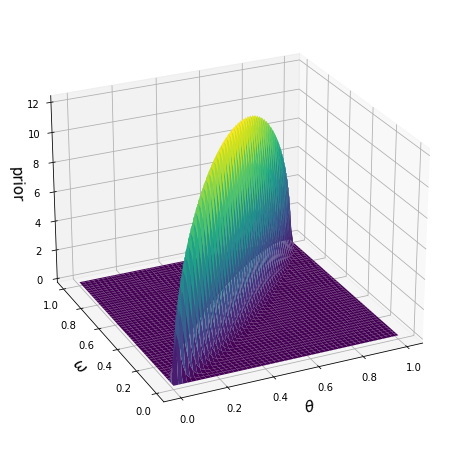

In [11]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection='3d')
# ax.contour3D(theta_grid, omega_grid, omega_theta_joint, 150, cmap='binary')
# ax.plot_wireframe(theta_grid, omega_grid, omega_theta_joint, color = "black")
ax.plot_surface(theta_grid, omega_grid, normalized_probability_density, cmap = "viridis", edgecolor='none')

ax.view_init(25, 245)

ax.set_xlabel(r"$\theta$", fontsize = 15)
ax.set_ylabel(r"$\omega$", fontsize = 15)
ax.set_zlabel("prior", fontsize = 15)

### Contour of the joint distribution of omega and theta $p(\theta$, $\omega)$

Note that the certainty about parameters $\omega$ and $\theta$ is low in their joint prior distribution (see below for their joint posterior distribtution).

Text(0, 0.5, '$\\omega$')

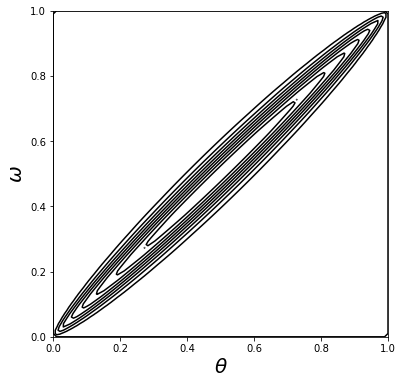

In [651]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.contour(theta_grid, omega_grid, omega_theta_joint, numpy.linspace(omega_theta_joint.min(), \
                                                                     omega_theta_joint.max(), 10), colors='k')

ax.set_xlabel(r"$\theta$", fontsize = 20)
ax.set_ylabel(r"$\omega$", fontsize = 20)

### Marginal distributions of $\omega$ and $\theta$

My results in the two plots below are greater than that of the book by a factor of 100. It is most likely related to the division by the area of each cell. Once I set the area of the cell to $0.1 \times 0.1$ instead of $0.01 \times 0.01$ I get the correct results. I am not sure if the result of the book is wrong or if I have made a mistake but as I said it is just a factor of 100 difference and even the conditional plots are correct! So, it does not seem that I have made a mistake but I am not sure!

In [663]:
marginal_omega = numpy.sum(normalized_probability_density, 0)

marginal_theta = numpy.sum(normalized_probability_density, 1)


Text(0, 0.5, 'marginal $p(\\theta)$')

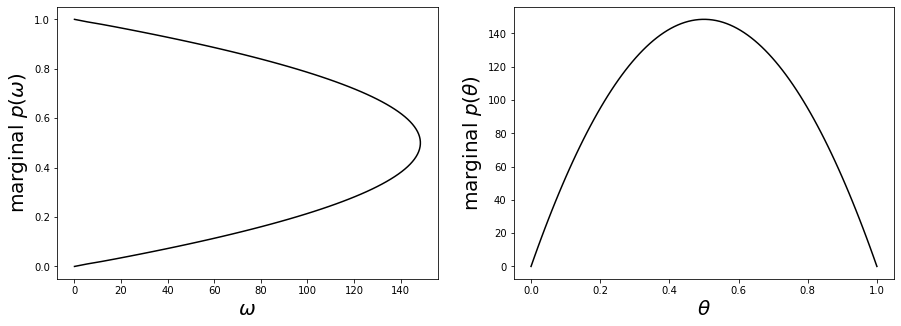

In [664]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].plot(marginal_omega, omega, "k-")
ax[1].plot(theta, marginal_theta, "k-")


ax[0].set_xlabel(r"$\omega$", fontsize = 20)
ax[0].set_ylabel(r"marginal $p(\omega)$", fontsize = 20)


ax[1].set_xlabel(r"$\theta$", fontsize = 20)
ax[1].set_ylabel(r"marginal $p(\theta)$", fontsize = 20)

### Conditional distribution of $\theta$

In [654]:
# Omega = 0.75
theta_conditioned_on_omega_75 = scipy.stats.beta.pdf(theta, a = 0.75*(100 - 2) + 1, \
                                              b = (1 - 0.75) * (100 - 2) + 1)

# Omega = 0.25
theta_conditioned_on_omega_25 = scipy.stats.beta.pdf(theta, a = 0.25*(100 - 2) + 1, \
                                              b = (1 - 0.25) * (100 - 2) + 1)

Text(0, 0.5, '$p(\\theta|\\omega = 0.75)$')

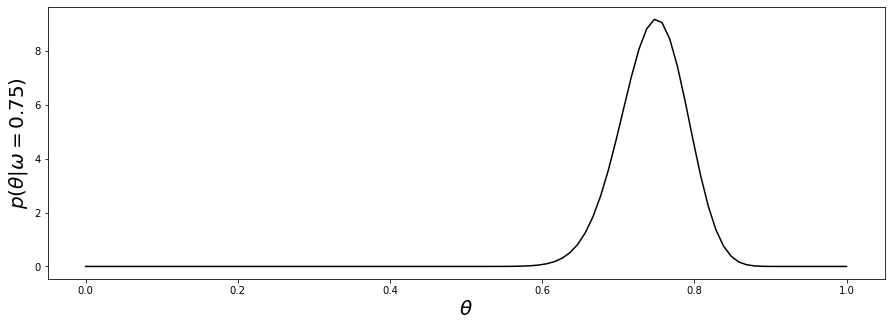

In [655]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))

ax.plot(theta, theta_conditioned_on_omega_75, "k-")

ax.set_xlabel(r"$\theta$", fontsize = 20)
ax.set_ylabel(r"$p(\theta|\omega = 0.75)$", fontsize = 20)

Text(0, 0.5, '$p(\\theta|\\omega = 0.25)$')

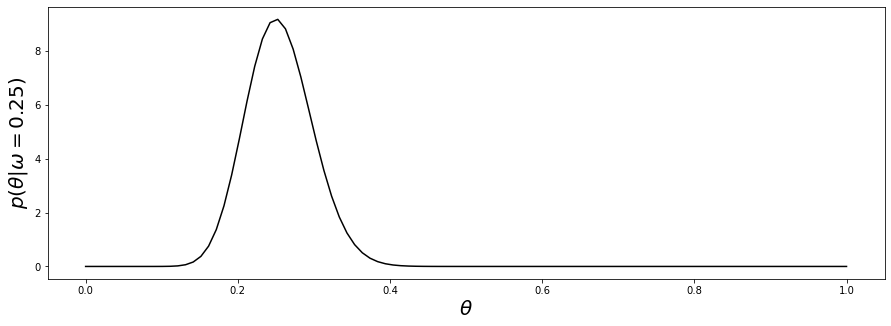

In [656]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))

ax.plot(theta, theta_conditioned_on_omega_25, "k-")

ax.set_xlabel(r"$\theta$", fontsize = 20)
ax.set_ylabel(r"$p(\theta|\omega = 0.25)$", fontsize = 20)

Text(0, 0.5, '$p(\\theta|\\omega = 0.75)$')

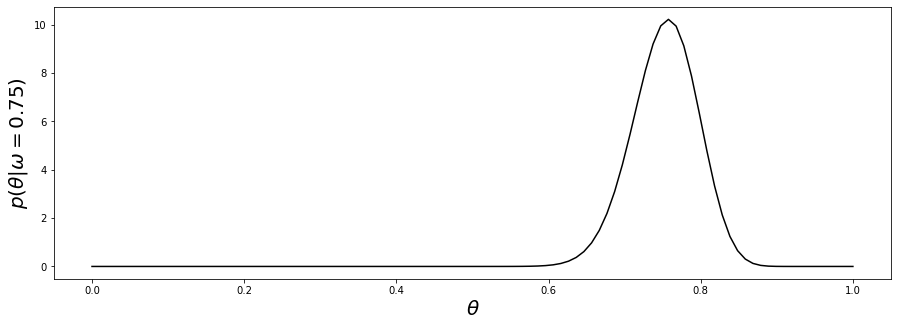

In [665]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))

ax.plot(theta, omega_theta_joint[:, 75], "k-")

ax.set_xlabel(r"$\theta$", fontsize = 20)
ax.set_ylabel(r"$p(\theta|\omega = 0.75)$", fontsize = 20)

In [667]:
omega_theta_joint[:, 25].max()

10.362082384708721

### Likelihood distribution (D = 9 heads and 3 tails)

likelihood $p(\{\gamma_i\}|\theta)$ follows a Bernoulli distribution and it does ___NOT___ depend on $\omega$!!

In [522]:
likelihood = (theta_grid**9) * (1 - theta_grid)**3

Text(0.5, 0, 'likelihood')

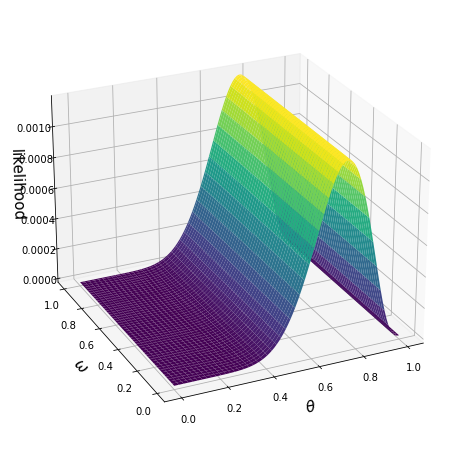

In [625]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection='3d')
# ax.contour3D(theta_grid, omega_grid, omega_theta_joint, 150, cmap='binary')
# ax.plot_wireframe(theta_grid, omega_grid, omega_theta_joint, color = "black")
ax.plot_surface(theta_grid, omega_grid, likelihood, cmap = "viridis", edgecolor='none')

ax.view_init(25, 245)

ax.set_xlabel(r"$\theta$", fontsize = 15)
ax.set_ylabel(r"$\omega$", fontsize = 15)
ax.set_zlabel("likelihood", fontsize = 15)

### Likelihood does NOT depend on $\omega$ (D = 9 heads and 3 tails)

Text(0, 0.5, '$\\omega$')

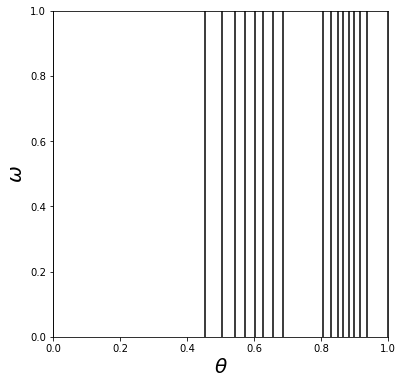

In [545]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.contour(theta_grid, omega_grid, likelihood, numpy.linspace(likelihood.min(), \
                                                                     likelihood.max(), 10), colors='k')

ax.set_xlabel(r"$\theta$", fontsize = 20)
ax.set_ylabel(r"$\omega$", fontsize = 20)

### Posterior distribution

Note that the likelihood function does ___not___ depend on $\omega$ so we exclude it from the likelihood distribution (I think by marginalising over $\omega$). Then we marginalise (sum) over all $\theta$ parameters of the likelihood function to find the normalising factor $p(D)$ (or total proabability of data ___D___ in the denominator). Finally, we multiply the likelihood with the prior density found above (under the name "normalized_probability_density") and divide the results by the total probability of the data (i.e. $p(D)$) to find the posterior distribution.

In [611]:
probability_of_data_marginalised_over_theta = numpy.sum(likelihood[:, 0])

In [612]:
posterior = (likelihood * normalized_probability_density)/probability_of_data_marginalised_over_theta

Text(0.5, 0, 'posterior')

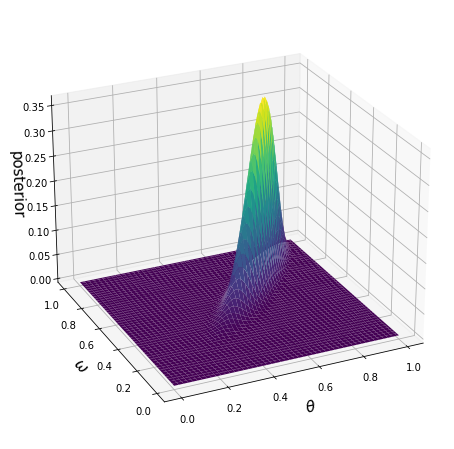

In [626]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection='3d')
# ax.contour3D(theta_grid, omega_grid, omega_theta_joint, 150, cmap='binary')
# ax.plot_wireframe(theta_grid, omega_grid, omega_theta_joint, color = "black")
ax.plot_surface(theta_grid, omega_grid, posterior, cmap = "viridis", edgecolor='none')

ax.view_init(25, 245)

ax.set_xlabel(r"$\theta$", fontsize = 15)
ax.set_ylabel(r"$\omega$", fontsize = 15)
ax.set_zlabel("posterior", fontsize = 15)

### Posterior contour (it does depend on both $\omega$ and $\theta$)

Note that unlike joint prior distribution (see above) the joint posterior distribution of the two parameters $p(\omega, \theta|$D = 9 heads and 3 tails) has higher certainty as we have observed the data set ___D___ and likelihood function $p(\{\gamma_i\}|\theta)$. 

Text(0, 0.5, '$\\omega$')

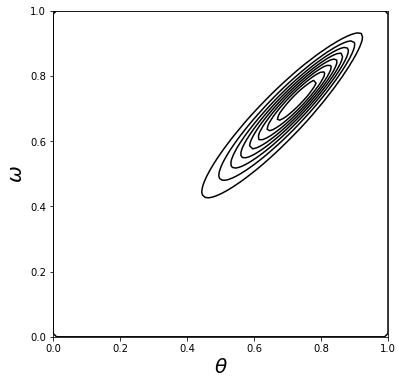

In [614]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.contour(theta_grid, omega_grid, posterior, numpy.linspace(posterior.min(), \
                                                                     posterior.max(), 10), colors='k')

ax.set_xlabel(r"$\theta$", fontsize = 20)
ax.set_ylabel(r"$\omega$", fontsize = 20)

### Conditional distribution of $\theta$ from posterio distribution

In [615]:
theta_posterior_conditioned_on_omega_75_and_data_D = posterior[:, 75]

theta_posterior_conditioned_on_omega_25_and_data_D = posterior[:, 25]

Text(0, 0.5, '$p(\\theta|\\omega = 0.75, D)$')

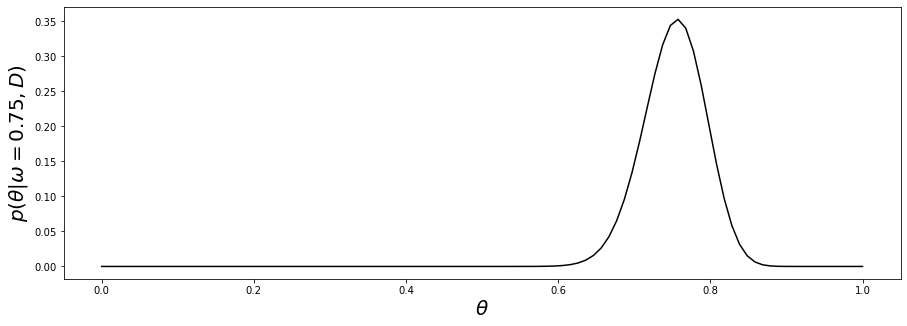

In [616]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))

ax.plot(theta, theta_posterior_conditioned_on_omega_75_and_data_D, "k-")

ax.set_xlabel(r"$\theta$", fontsize = 20)
ax.set_ylabel(r"$p(\theta|\omega = 0.75, D)$", fontsize = 20)

Text(0, 0.5, '$p(\\theta|\\omega = 0.25, D)$')

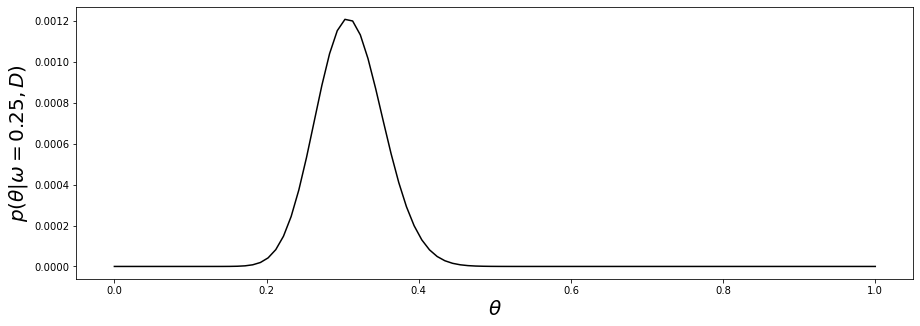

In [617]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))

ax.plot(theta, theta_posterior_conditioned_on_omega_25_and_data_D, "k-")

ax.set_xlabel(r"$\theta$", fontsize = 20)
ax.set_ylabel(r"$p(\theta|\omega = 0.25, D)$", fontsize = 20)

In [622]:
marginal_omega_posterior = numpy.sum(posterior, 0)

marginal_theta_posterior = numpy.sum(posterior, 1)


Text(0, 0.5, 'marginal $p(\\theta)$')

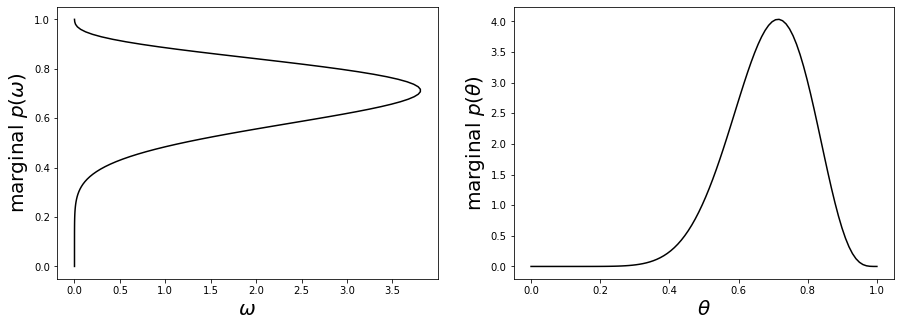

In [623]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].plot(marginal_omega_posterior, omega, "k-")
ax[1].plot(theta, marginal_theta_posterior, "k-")


ax[0].set_xlabel(r"$\omega$", fontsize = 20)
ax[0].set_ylabel(r"marginal $p(\omega)$", fontsize = 20)


ax[1].set_xlabel(r"$\theta$", fontsize = 20)
ax[1].set_ylabel(r"marginal $p(\theta)$", fontsize = 20)